0) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [2]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
 

In [3]:
#ouverture du fichier csv avec séparation des données par le ; 
data=pd.read_csv('courbey(x).csv', sep=';')

2) Pour chaque colonne dans le tableau de données, donner le nombre d'éléments, les valeurs max, min

In [4]:
#Affichage du nombre d'éléments, de l avaleur max et min de l'abscissee x
print(len(data['x']),data['x'].max(),data['x'].min())

#Affichage du nombre d'éléments, de l avaleur max et min de l'odronnée y'
print(len(data['y']),data['y'].max(),data['y'].min())

100 2.903744163489417 -2.773576896274357
100 9.515817289644827 1.6649617165610104


3) Tracer x et y en fonction de la position dans le tableau. Tracer y(x), sous forme de nuage de points

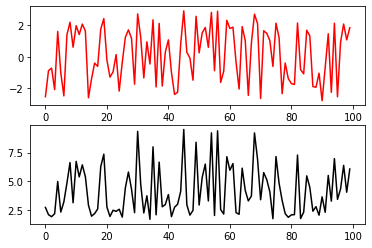

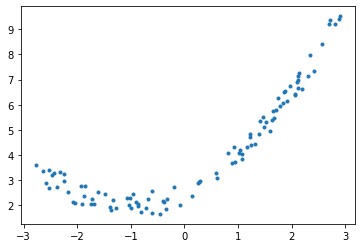

In [5]:
#x en fonction de la position dans le tableau
plt.subplot(211)
plt.plot(data['x'],'r')

#y en fonction de la position dans le tableau
plt.subplot(212)
plt.plot(data['y'],'k')
plt.show()

#y(x)
plt.plot(data['x'],data['y'],'.')
plt.show()

4) Appliquer aux données un modèle de régression linéaire afin de tracer la droite de régression. (Remarque: Utiliser reshape)

In [6]:
#Séparation des données en 4 listes avec des données test de 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['x'],data['y'],test_size=0.2)

#Remise en forme des donées pour obtenir des matrices et plus des dataframes
x_train=X_train.values.reshape(-1,1)
y_train=Y_train.values.reshape(-1,1)
x_test=X_test.values.reshape(-1,1)
y_test=Y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
#entrainement du modèle de regression avec données d'entrainement
model.fit(x_train,y_train)
#prédiction pour les données test
y_predict=model.predict(x_test)

model.score(x_train,y_train), model.score(x_test,y_test)

#On obtient des valeurs de coefficienst de détermination tro faibles (comme attendu)


(0.7283494020348689, 0.585976793421483)

5) Appliquer aux données un modèle de régression Polynomiale.

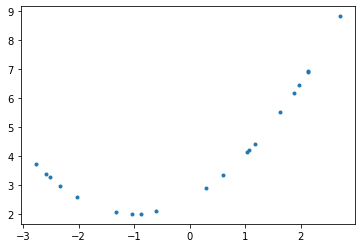

In [7]:
from sklearn.preprocessing import PolynomialFeatures
#on choisit un degré de polynome pour le modèle désiré
polynomial_features= PolynomialFeatures(degree=4)
#entrainement et transformation des données en abscisse pour un polynome de degré 4
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
#entrainement d'un modèle linéaire pour les datas d'entrainement en y et les données transformées en x
model.fit(x_poly, y_train)
#Prédiction avec les donées test 
x_poly_test=polynomial_features.transform(x_test)
y_poly_predict = model.predict(x_poly_test)

plt.plot(x_test,y_poly_predict,'.')


6) Calculer le score

In [8]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_poly_predict))

#on obtient un coefficient de détermination bienplus élevé et proche de 1

0.9781279614962286


7) Tracer le nuage des points et tracer la courbe de prédiction. Remarque: il faut ordonner les valeurs de x et y

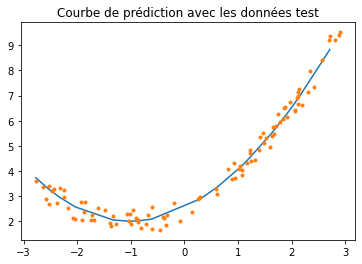

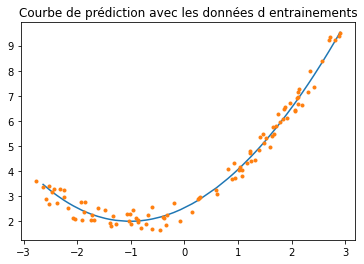

In [9]:
#On commence par ordonner la liste des abscisses en gardant leur indice dans la liste d'origine. ON pourra donc associer chaque ordonée à son abscisse
ls=[]
for i in range(len(x_test)):
    ls.append((x_test[i],i))
ls.sort(key = lambda x: x[0])

#On crée donc 2 listes sui correspondent à la liste des absocisse x ordonnées et celle des ordonnées y qui correspondent
new_y,new_x=[],[]
for elem in ls:
    new_y.append(y_poly_predict[elem[1]])
    new_x.append(elem[0])

plt.plot(new_x,new_y)
plt.plot(data['x'],data['y'],'.')
plt.title('Courbe de prédiction avec les données test')
plt.show()

#Trop peu de points test pour bien tracer la courbe... On la retrace donc en évaluant sur les données d'entrainements
y_poly_predict_data=model.predict(x_poly)
ls1=[]
for i in range(len(x_train)):
    ls1.append((x_train[i],i))
ls1.sort(key = lambda x: x[0])

new_y1,new_x1=[],[]
for elem in ls1:
    new_y1.append(y_poly_predict_data[elem[1]])
    new_x1.append(elem[0])

plt.plot(new_x1,new_y1)
plt.plot(data['x'],data['y'],'.')
plt.title('Courbe de prédiction avec les données d entrainements')
plt.show()